In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

In [2]:
def read_csfile(csfile):
    content = np.array(np.load(csfile).tolist())
    dtype   = np.load(csfile).dtype
    header = []
    for key in dtype.fields.keys():
        header.append(key)
    header = np.array(header)
    return header, content

In [3]:
particle_file = '/Users/Expo/Desktop/Cryo-EM/Project/cryoem-analysis-tools/data/P15_J35_passthrough_particles.cs'

In [4]:
header, content = read_csfile(particle_file)

In [5]:
header

array(['uid', 'location/micrograph_uid', 'location/exp_group_id',
       'location/micrograph_path', 'location/micrograph_shape',
       'location/center_x_frac', 'location/center_y_frac',
       'pick_stats/ncc_score', 'pick_stats/power',
       'pick_stats/template_idx', 'pick_stats/angle_rad', 'ctf/type',
       'ctf/exp_group_id', 'ctf/accel_kv', 'ctf/cs_mm',
       'ctf/amp_contrast', 'ctf/df1_A', 'ctf/df2_A', 'ctf/df_angle_rad',
       'ctf/phase_shift_rad', 'ctf/scale', 'ctf/scale_const',
       'ctf/shift_A', 'ctf/tilt_A', 'ctf/trefoil_A', 'ctf/tetra_A',
       'ctf/anisomag', 'ctf/bfactor'], dtype='<U25')

In [6]:
content.shape

(193557, 28)

In [7]:
content[:10,1]

array([2325032373660092106, 2325032373660092106, 2325032373660092106,
       2325032373660092106, 2325032373660092106, 2325032373660092106,
       2325032373660092106, 2325032373660092106, 2325032373660092106,
       2325032373660092106], dtype=object)

In [8]:
mic1 = np.where(content[:,1]==content[0,1])

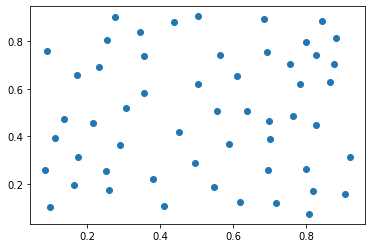

In [9]:
plt.scatter(content[mic1,5],content[mic1,6])
plt.show()

In [10]:
# Using sklearn.metrics.pairwise.euclidean_distances function
def findMinDistance(mic, min_distance):
    loc = list(zip(content[mic,5][0], content[mic,6][0]))
    distances = euclidean_distances(loc, loc)

    for x in distances:
        minval = np.min(x[np.nonzero(x)])
        min_distances.append(minval)

In [11]:
# Array of distance to the nearest neighbor
min_distances=[]

# Find the unique ID of the pictures
uniqID = np.unique(content[:,1])

for i in uniqID:
    mic = np.where(content[:,1]==i)
    findMinDistance(mic, min_distances)

<function matplotlib.pyplot.show(*args, **kw)>

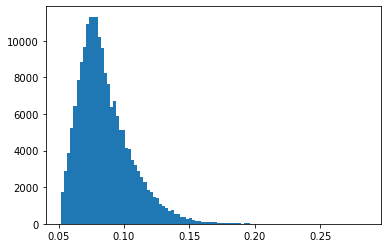

In [18]:
plt.hist(min_distances, bins = 100)
plt.show